# Exploring and Transforming JSON Schemas - Lab

# Introduction

In this lab, you'll practice exploring a JSON file whose structure and schema is unknown to you. We will provide you with limited information, and you will explore the dataset to answer the specified question.

## Objectives

You will be able to:

* Use the `json` module to load and parse JSON documents
* Explore and extract data using unknown JSON schemas
* Convert JSON to a pandas dataframe

## Your Task: Create a Bar Graph of the Top 10 States with the Highest Asthma Rates for Adults Age 18+

The information you need to create this graph is located in `disease_data.json`. It contains both data and metadata.

You are given the following codebook/data dictionary:

* The actual data values are associated with the key `'DataValue'`
* The state names are associated with the key `'LocationDesc'`
* To filter to the appropriate records, make sure:
  * The `'Question'` is `'Current asthma prevalence among adults aged >= 18 years'`
  * The `'StratificationCategoryID1'` is `'OVERALL'`
  * The `'DataValueTypeID'` is `'CRDPREV'`
  * The `'LocationDesc'` is not `'United States'`
  
The provided JSON file contains both data and metadata, and you will need to parse the metadata in order to understand the meanings of the values in the data.

No further information about the structure of this file is provided.

## Load the JSON File

Load the data from the file `disease_data.json` into a variable `data`.

In [1]:
import json
with open('disease_data.json', 'r') as f:
    data = json.load(f)

## Explore the Overall Structure

What is the overall data type of `data`?

In [2]:
type(data)

dict

What are the keys?

In [3]:
data.keys()

dict_keys(['meta', 'data'])

What are the data types associates with those keys?

In [4]:
type(data.keys())

dict_keys

In [5]:
type(data['meta'])

dict

Perform additional exploration to understand the contents of these values. For dictionaries, what are their keys? For lists, what is the length, and what does the first element look like?

In [6]:
len(data.keys())

2

In [7]:
[i[0] for i in data.keys()]

['m', 'd']

As you likely identified, we have a list of lists forming the `'data'`. In order to make sense of that list of lists, we need to find the meaning of each index, i.e. the names of the columns.

## Identify the Column Names

Look through the metadata to find the *names* of the columns, and assign that variable to `column_names`. This should be a list of strings. (If you just get the values associated with the `'columns'` key, you will have a list of dictionaries, not a list of strings.)

In [12]:
column_names = [i['name'] for i in data['meta']['view']['columns']]

The following code checks that you have the correct column names:

In [13]:
# Run this cell without changes

# 42 total columns
assert len(column_names) == 42

# Each name should be a string, not a dict
assert type(column_names[0]) == str and type(column_names[-1]) == str

# Check that we have some specific strings
assert "DataValue" in column_names
assert "LocationDesc" in column_names
assert "Question" in column_names
assert "StratificationCategoryID1" in column_names
assert "DataValueTypeID" in column_names

## Filter Rows Based on Columns

Recall that we only want to include records where:

* The `'Question'` is `'Current asthma prevalence among adults aged >= 18 years'`
* The `'StratificationCategoryID1'` is `'OVERALL'`
* The `'DataValueTypeID'` is `'CRDPREV'`
* The `'LocationDesc'` is not `'United States'`

Combining knowledge of the data and metadata, filter out the rows of data that are not relevant.

(You may find the `pandas` library useful here.)

In [19]:
import pandas as pd

ppd = pd.DataFrame(data=data['data'][1:],columns=column_names)
filtered_df = ppd[
    (ppd['Question'] == 'Current asthma prevalence among adults aged >= 18 years') &
    (ppd['StratificationCategoryID1'] == 'OVERALL') &
    (ppd['DataValueTypeID'] == 'CRDPREV') &
    (ppd['LocationDesc'] != 'United States')
]
filtered_df

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
9370,9369,6BEC61D0-E04B-44BA-8170-F7D6A4C40A09,9369,1527194523,959778,1527194523,959778,None,2016,2016,...,01,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9371,9370,5D6EDDA9-B241-4498-A262-ED20AB78C44C,9370,1527194523,959778,1527194523,959778,None,2016,2016,...,02,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9372,9371,5FCE0D49-11FD-4545-B9E7-14F503123105,9371,1527194523,959778,1527194523,959778,None,2016,2016,...,04,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9373,9372,68F151CE-3084-402C-B672-78A43FBDE287,9372,1527194523,959778,1527194523,959778,None,2016,2016,...,05,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9374,9373,D3F00ED2-A069-4E40-B42B-5A2528A91B6F,9373,1527194523,959778,1527194523,959778,None,2016,2016,...,06,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9375,9374,A8B4F198-D388-4663-B82B-936C5FB37428,9374,1527194523,959778,1527194523,959778,None,2016,2016,...,08,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9376,9375,B2FB1AEA-5E2A-4E7C-9A93-586EA18EBE99,9375,1527194523,959778,1527194523,959778,None,2016,2016,...,09,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9377,9376,7C5D70DE-DE95-4AAD-A666-2260B5A16363,9376,1527194523,959778,1527194523,959778,None,2016,2016,...,10,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9378,9377,1893C9A3-C6CE-4F47-A66F-85A4F89F244F,9377,1527194523,959778,1527194523,959778,None,2016,2016,...,11,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9379,9378,D47614E3-47D4-40D6-AC29-C434C876F3DF,9378,1527194523,959778,1527194523,959778,None,2016,2016,...,12,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None


You should have 54 records after filtering.

## Extract the Attributes Required for Plotting

For each record, the only information we actually need for the graph is the `'DataValue'` and `'LocationDesc'`. Create a list of records that only contains these two attributes.

Also, make sure that the data values are numbers, not strings.

In [25]:
# Assuming you've already loaded your data into the 'filtered_df' DataFrame
# Now, select the necessary columns
selected_columns = filtered_df[['DataValue', 'LocationDesc']]

# Convert the DataFrame with the selected columns into a list of dictionaries
list_of_records = selected_columns.to_dict(orient='records')

# Optionally, print the list to verify
print(list_of_records)


[{'DataValue': 9.7, 'LocationDesc': 'Alabama'}, {'DataValue': 8.8, 'LocationDesc': 'Alaska'}, {'DataValue': 9.4, 'LocationDesc': 'Arizona'}, {'DataValue': 8.5, 'LocationDesc': 'Arkansas'}, {'DataValue': 7.8, 'LocationDesc': 'California'}, {'DataValue': 8.8, 'LocationDesc': 'Colorado'}, {'DataValue': 10.5, 'LocationDesc': 'Connecticut'}, {'DataValue': 8.5, 'LocationDesc': 'Delaware'}, {'DataValue': 9.8, 'LocationDesc': 'District of Columbia'}, {'DataValue': 6.7, 'LocationDesc': 'Florida'}, {'DataValue': 8.5, 'LocationDesc': 'Georgia'}, {'DataValue': 10.7, 'LocationDesc': 'Hawaii'}, {'DataValue': 9.3, 'LocationDesc': 'Idaho'}, {'DataValue': 8.9, 'LocationDesc': 'Illinois'}, {'DataValue': 10.2, 'LocationDesc': 'Indiana'}, {'DataValue': 7.8, 'LocationDesc': 'Iowa'}, {'DataValue': 8.8, 'LocationDesc': 'Kansas'}, {'DataValue': 11.6, 'LocationDesc': 'Kentucky'}, {'DataValue': 8.3, 'LocationDesc': 'Louisiana'}, {'DataValue': 12.2, 'LocationDesc': 'Maine'}, {'DataValue': 9.4, 'LocationDesc': 'M

## Find Top 10 States

Sort by `'DataValue'` and limit to the first 10 records.

In [28]:
sorted_df = filtered_df.sort_values(by='DataValue', ascending=False).head(10)
sorted_df['LocationDesc']

9389            Maine
9401       New Mexico
9418    West Virginia
9387         Kentucky
9399    New Hampshire
9392         Michigan
9412        Tennessee
9381           Hawaii
9422      Puerto Rico
9409     Rhode Island
Name: LocationDesc, dtype: object

## Separate the Names and Values for Plotting

Assign the names of the top 10 states to a list-like variable `names`, and the associated values to a list-like variable `values`. Then the plotting code below should work correctly to make the desired bar graph.

In [31]:
# Replace None with appropriate code

names = sorted_df['LocationDesc'].to_list()
values = sorted_df['DataValue'].tolist() 
print(names)
print(values)

['Maine', 'New Mexico', 'West Virginia', 'Kentucky', 'New Hampshire', 'Michigan', 'Tennessee', 'Hawaii', 'Puerto Rico', 'Rhode Island']
[12.2, 11.8, 11.8, 11.6, 11.4, 10.9, 10.9, 10.7, 10.7, 10.7]


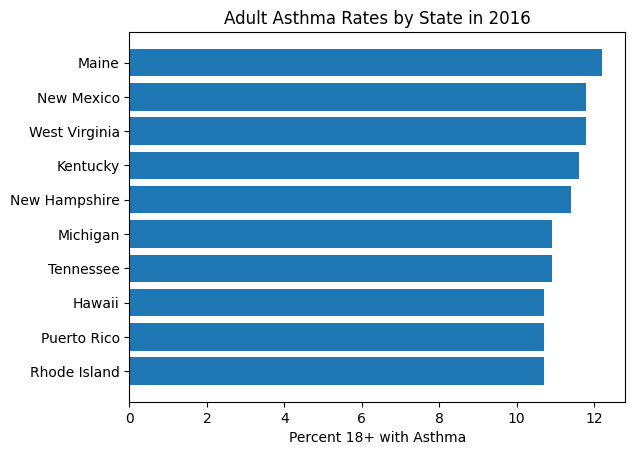

In [32]:
# Run this cell without changes

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.barh(names[::-1], values[::-1]) # Values inverted so highest is at top
ax.set_title('Adult Asthma Rates by State in 2016')
ax.set_xlabel('Percent 18+ with Asthma');

## Summary

In this lab you got some extended practice exploring the structure of JSON files and visualizing data.